In [90]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [91]:
from sklearn.model_selection import train_test_split
import numpy as np

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [92]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [93]:
x_train.shape

(1437, 64)

In [94]:
y_train.shape

(1437,)

In [95]:
x_test.shape

(360, 64)

In [96]:
y_test.shape

(360,)

In [97]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn import metrics

In [98]:
k_range = range(1,9)
K = []
scores = {}
training = []
test = []
for k in k_range:
    knn = knc(n_neighbors = k)
    knn.fit(x_train, y_train)
    training_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    K.append(k)
    
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

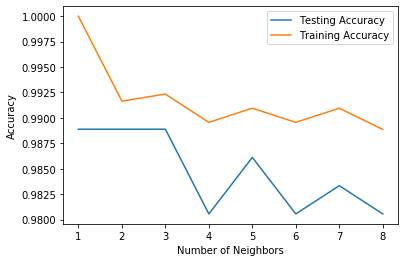

In [99]:
import matplotlib.legend
plt.plot(k_range, test)
plt.plot(k_range, training)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.legend(['Testing Accuracy', 'Training Accuracy'], loc = 'upper right')

In [100]:
import matplotlib.pyplot as plt
import numpy as np

In [101]:
from sklearn import svm
from sklearn.metrics import classification_report

In [102]:
param_C = 1.0
param_gamma = 'auto_deprecated'
param_kernel = 'linear'
classifier = svm.SVC(C=param_C,kernel=param_kernel,gamma=param_gamma)

classifier.fit(x_train, y_train)

expected = y_test
predicted = classifier.predict(x_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.89      1.00      0.94        32
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        33
           4       1.00      0.97      0.99        37
           5       0.95      1.00      0.97        38
           6       1.00      0.97      0.99        35
           7       1.00      1.00      1.00        38
           8       0.97      0.91      0.94        33
           9       1.00      0.97      0.99        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg 

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
import seaborn as sbn

In [105]:
matrix = confusion_matrix(expected, predicted)

Text(0.5, 51.0, 'Predicted Label')

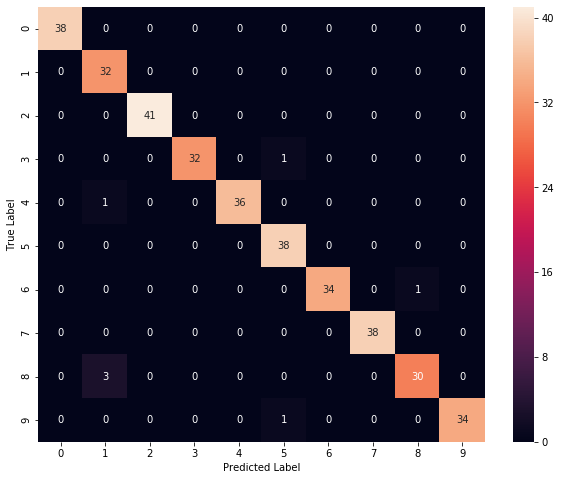

In [106]:
ax = plt.subplots(figsize=(10,8))
ab = sbn.heatmap(matrix, annot=True, cbar=True)
bottom, top = ab.get_ylim()
ab.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [110]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)    
predicted = knn.predict(x_test)
knnAcc = metrics.accuracy_score(y_test, predicted)

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
bayesAcc = metrics.accuracy_score(y_test, y_pred)

svm = SVC(gamma='scale')
svm.fit(x, y)
svmAcc = svm.score(x, y)

Text(0.5, 0, 'Classifier')

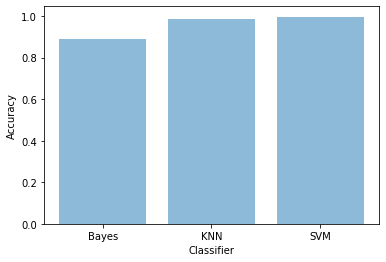

In [111]:
objects = ('Bayes','KNN','SVM')
y_pos = np.arange(len(objects))
acc = [bayesAcc,knnAcc,svmAcc]

plt.bar(y_pos, acc, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Classifier')

In [27]:
import pandas as pd

In [28]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head(10)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.10,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.00,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.50,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.10,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.10,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
5,8331465,1.41,0.30,8.183160,26.46741,43952,124.1394,80.4,4.6,Europe & Central Asia
6,8868713,1.99,0.10,5.109538,25.65117,14365,128.6024,70.6,43.3,Europe & Central Asia
7,348587,1.89,3.10,3.131921,27.24594,24373,124.3862,72.2,14.5,America
8,148252473,2.38,0.06,0.319161,20.39742,2265,125.0307,68.4,55.9,South Asia
9,277315,1.83,1.30,6.008279,26.38439,16075,126.3940,75.3,15.4,America


(9.0, 0.0)

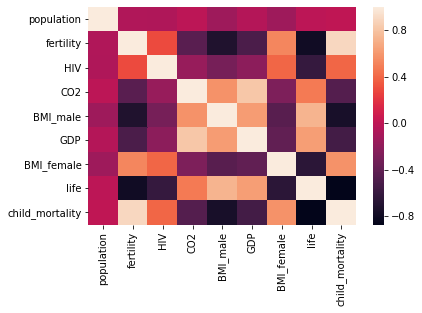

In [29]:
ax = sbn.heatmap(gapminder.corr(), cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [136]:
from sklearn.linear_model import LinearRegression

In [173]:
x = gapminder['fertility'].values.reshape(-1,1)
y = gapminder['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

Text(0, 0.5, 'Life Expectency')

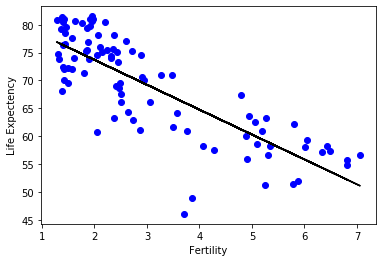

In [176]:
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_train, lr.predict(x_train), color = "black")
plt.xlabel("Fertility")
plt.ylabel("Life Expectency")